# Wprowadzenie do Biblioteki SciPy

## Czym jest SciPy?

[SciPy](https://scipy.org/) to biblioteka języka Python, która stanowi rdzeń ekosystemu narzędzi do obliczeń naukowych i technicznych. Zbudowana jest na bazie biblioteki NumPy, rozszerzając jej możliwości o szeroki wachlarz algorytmów numerycznych i narzędzi zgrupowanych w tematyczne moduły. SciPy udostępnia wysokopoziomowe komendy i klasy do wizualizacji i manipulacji danymi, co czyni ją niezwykle użyteczną w badaniach naukowych, analizie danych i inżynierii.

## Twórcy

SciPy to projekt typu open-source, rozwijany i utrzymywany przez dużą, aktywną, międzynarodową społeczność deweloperów, naukowców i użytkowników. Chociaż kluczowe role we wczesnym etapie tworzenia odegrali m.in. Travis Oliphant (twórca NumPy), Pearu Peterson oraz Eric Jones, to obecny kształt i bogactwo biblioteki są wynikiem wkładu setek współtwórców na przestrzeni lat. Rozwój jest koordynowany publicznie, głównie za pośrednictwem platformy GitHub.

## Jakie problemy rozwiązuje SciPy?

Biblioteka SciPy została stworzona, aby dostarczyć programistom i naukowcom w Pythonie narzędzi do rozwiązywania typowych problemów obliczeniowych spotykanych w nauce i technice. Oferuje ona zaimplementowane, wydajne i przetestowane algorytmy m.in. do:

* **Optymalizacji:** Znajdowanie minimum lub maksimum funkcji, dopasowywanie krzywych.
* **Algebry liniowej:** Zaawansowane operacje na macierzach, rozkłady (np. SVD, QR), rozwiązywanie układów równań liniowych, obliczanie wartości i wektorów własnych.
* **Całkowania numerycznego:** Obliczanie całek oznaczonych.
* **Interpolacji:** Wygładzanie i estymowanie wartości pomiędzy punktami danych.
* **Przetwarzania sygnałów:** Filtrowanie, analiza Fouriera (FFT), projektowanie filtrów.
* **Przetwarzania obrazów:** Podstawowe operacje na obrazach, filtrowanie, analiza morfologiczna.
* **Statystyki:** Generowanie liczb losowych z różnych rozkładów, testy statystyczne, estymacja gęstości.
* **Funkcji specjalnych:** Obliczanie wartości wielu powszechnie używanych funkcji matematycznych i fizycznych (np. funkcje Bessela, funkcje gamma, funkcje błędu).
* **Rozwiązywania równań różniczkowych zwyczajnych (ODE):** Integracja numeryczna układów równań różniczkowych.

## Dla kogo jest ta biblioteka?

SciPy jest przeznaczona dla bardzo szerokiego grona użytkowników, w zasadzie dla każdego, kto potrzebuje wykonywać obliczenia numeryczne w Pythonie, wykraczające poza podstawowe operacje arytmetyczne i manipulację tablicami (które zapewnia NumPy). Głównymi odbiorcami są:

* **Naukowcy i badacze:** Z różnych dziedzin, takich jak fizyka, biologia, chemia, astronomia, ekonomia, neuronauka.
* **Inżynierowie:** Potrzebujący narzędzi do symulacji, modelowania, analizy danych pomiarowych, przetwarzania sygnałów.
* **Analitycy danych (Data Scientists):** Do zadań związanych z optymalizacją, statystyką, przetwarzaniem danych.
* **Studenci:** Kierunków ścisłych, technicznych i ekonomicznych, uczący się metod numerycznych i analizy danych.
* **Matematycy:** Zajmujący się matematyką stosowaną i obliczeniową.
* **Programiści:** Tworzący aplikacje wymagające zaawansowanych funkcji obliczeniowych.

Krótko mówiąc, SciPy jest kluczowym narzędziem dla każdego, kto pracuje z danymi numerycznymi i potrzebuje solidnych, sprawdzonych algorytmów do ich analizy i przetwarzania w środowisku Python.


# Instalacja

Najprostszym i najczęściej stosowanym sposobem instalacji biblioteki SciPy jest użycie menedżera pakietów `pip`, który jest standardowym narzędziem do zarządzania pakietami w środowisku Python.

Przed instalacją **zdecydowanie zaleca się** utworzenie i aktywację dedykowanego środowiska wirtualnego (np. za pomocą modułu `venv` wbudowanego w Python lub narzędzia `conda`). Pozwoli to uniknąć potencjalnych konfliktów zależności między różnymi projektami.

Aby zainstalować SciPy za pomocą narzędzia `pip` należy wykonać następujące polecenie w terminalu:

```bash
pip install scipy
```

# Zastosowania

W kolejnych podpunktach zostaną opisane zastosowania konkretnych modułów bilbioteki SciPy

## Moduł `scipy.optimize`: Optymalizacja

Moduł `scipy.optimize` dostarcza szerokiej gamy algorytmów służących do zadań optymalizacyjnych oraz znajdowania pierwiastków funkcji.

### Przykład 1: Znajdowanie minimum funkcji jednej zmiennej

Jednym z podstawowych zadań jest znalezienie argumentu `x`, dla którego funkcja `f(x)` osiąga lokalne minimum. Służy do tego funkcja `minimize_scalar`.

Załóżmy, że chcemy znaleźć minimum funkcji $f(x) = (x - 3)^2 + 1$. Oczywiście wiemy analitycznie, że minimum znajduje się w punkcie $x=3$ i wynosi $1$. Zobaczmy, jak poradzi sobie z tym SciPy.

In [239]:
from scipy.optimize import minimize_scalar

def func1d(x):
  return (x - 3)**2 + 1

res = minimize_scalar(func1d)
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.0
       x: 3.0
     nit: 4
    nfev: 9

In [240]:
print(f"\nCzy optymalizacja zakończyła się sukcesem? {res.success}")
print(f"Minimum znaleziono w punkcie x = {res.x:.2f}")
print(f"Wartość funkcji w minimum f(x) = {res.fun:.2f}")
print(f"Liczba ewaluacji funkcji: {res.nfev}")


Czy optymalizacja zakończyła się sukcesem? True
Minimum znaleziono w punkcie x = 3.00
Wartość funkcji w minimum f(x) = 1.00
Liczba ewaluacji funkcji: 9


## Przykład 2: Znajdowanie minimum funkcji dwóch zmiennych z ograniczeniami liniowymi

Rozważmy nowy problem: chcemy znaleźć **minimum** funkcji celu:

$f(x, y) = (x - 1)^2 + (y - 2.5)^2$

Funkcja ta ma swoje globalne, nieograniczone minimum w punkcie $(1, 2.5)$, gdzie jej wartość wynosi 0.

Nałożymy jednak następujące **ograniczenia** w postaci nierówności liniowych:

1.  $x - 2y + 2 \ge 0$
2.  $-x - 2y + 6 \ge 0$
3.  $-x + 2y + 2 \ge 0$
4.  $x \ge 0$
5.  $y \ge 0$

Obszar dopuszczalny zdefiniowany przez te nierówności to wielokąt wypukły. Ponieważ nieograniczone minimum $(1, 2.5)$ nie spełnia wszystkich ograniczeń (np. pierwszego: $1 - 2(2.5) + 2 = -2 < 0$), spodziewamy się, że rozwiązanie leżeć będzie na granicy tego wielokąta.

Ponownie użyjemy funkcji `minimize` z metodą `'SLSQP'` (algorytm Sequential Least SQuares Programming) i zdefiniujemy ograniczenia jako listę słowników. Zauważmy, że wszystkie nierówności są już w wymaganej formie $fun(x,y) \ge 0$ dla typu `'ineq'`. Użyjemy też parametru `bounds` aby uwzględnić warunki $x \ge 0$ i $y \ge 0$

In [241]:
from scipy.optimize import minimize

def func(vec):
  """f(x, y) = (x - 1)^2 + (y - 2.5)^2"""
  x, y = vec
  return (x - 1)**2 + (y - 2.5)**2

# Definicje funkcji dla ograniczeń (wszystkie typu fun(x, y) >= 0)
def constraint1(vec):
  """x - 2y + 2 >= 0"""
  return vec[0] - 2 * vec[1] + 2

def constraint2(vec):
  """-x - 2y + 6 >= 0"""
  return -vec[0] - 2 * vec[1] + 6

def constraint3(vec):
  """-x + 2y + 2 >= 0"""
  return -vec[0] + 2 * vec[1] + 2


constraints_list = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'ineq', 'fun': constraint3},
]

# Początkowy punkt startowy (wybieramy punkt spełniający ograniczenia, np. (1, 1))
initial_guess = [1.0, 1.0]

# Ograniczenia x >= 0, y >= 0
bounds = ((0, None), (0, None))

res = minimize(func,initial_guess, constraints=constraints_list, bounds=bounds, method='SLSQP')
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.7999999999999992
       x: [ 1.400e+00  1.700e+00]
     nit: 4
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 12
    njev: 4

In [242]:
print(f"\nCzy optymalizacja zakończyła się sukcesem? {res.success}")
print(f"Minimum znaleziono w punkcie x = {res.x[0]:.2f}, y = {res.x[1]:.2f}")
print(f"Wartość funkcji w minimum f(x) = {res.fun:.2f}")
print(f"Liczba ewaluacji funkcji: {res.nfev}")


Czy optymalizacja zakończyła się sukcesem? True
Minimum znaleziono w punkcie x = 1.40, y = 1.70
Wartość funkcji w minimum f(x) = 0.80
Liczba ewaluacji funkcji: 12


## Przykład 3: Dopasowywanie funkcji do danych pomiarowych

Funkcja `scipy.optimize.curve_fit` jest jednym z najczęściej używanych narzędzi w SciPy, służącym do **dopasowywania (fitowania) modelu matematycznego (funkcji) do danych pomiarowych**. Działa ona na zasadzie nieliniowej metody najmniejszych kwadratów, co oznacza, że stara się znaleźć takie wartości parametrów modelu, aby suma kwadratów różnic między wartościami przewidywanymi przez model a rzeczywistymi danymi była jak najmniejsza. Poniższy kod demonstruje podstawowe użycie `curve_fit`:

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 1. Tworzymy sztuczny zestaw danych
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

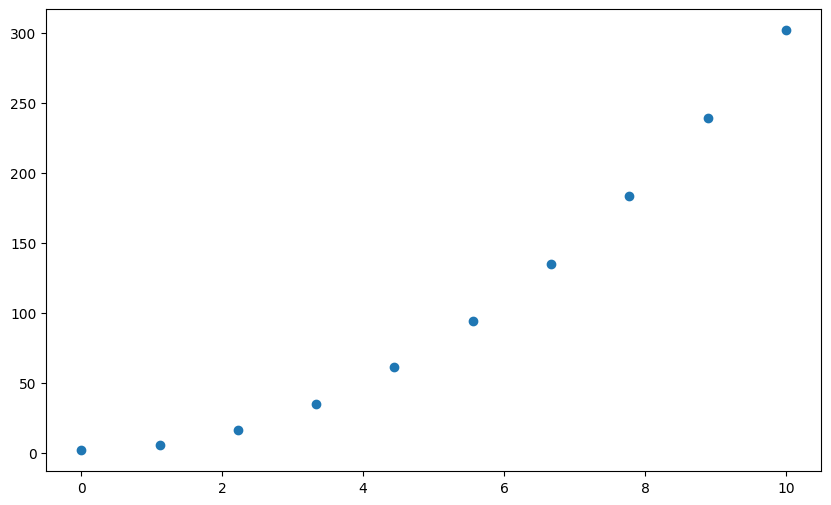

In [244]:
# 2. Wizualizacja zestawu danych
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data)

In [245]:
from scipy.optimize import curve_fit

# 3. Definiujemy funkcję do dopasowania - funkcja kwadratowa
def func(x, a, b):
    return a*x**2 + b

# 4. Dopasowujemy funkcję do danych. Podajemy także punkt startowy dla algorytmu.
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))

# 5. Odczytanie znalezionych optymalnych wartości parametrów `a` i `b`.
print(f"\nZnalezione parametry: a = {popt[0]:.2f}, b = {popt[1]:.2f}")



Znalezione parametry: a = 3.00, b = 2.00


## Moduł `scipy.interpolate`: Interpolacja Danych

Moduł `scipy.interpolate` dostarcza narzędzi do **interpolacji danych**. Interpolacja polega na konstruowaniu nowych punktów danych w zakresie znanego, dyskretnego zbioru punktów. Mówiąc prościej, jeśli mamy zbiór punktów $(x_i, y_i)$, interpolacja pozwala nam oszacować wartość $y$ dla dowolnego $x$ leżącego *pomiędzy* znanymi wartościami $x_i$.

Jest to niezwykle użyteczne w wielu sytuacjach:
* Gdy mamy dane pomiarowe tylko w niektórych punktach, a potrzebujemy wartości w punktach pośrednich.
* Do wygładzania danych lub krzywych.
* Do zwiększania rozdzielczości danych (tworzenia gęstszej siatki punktów).
* Jako krok w bardziej złożonych algorytmach numerycznych.

`scipy.interpolate` oferuje wiele różnych technik interpolacji, od prostych (jak interpolacja liniowa) po bardziej zaawansowane (jak funkcje sklejane - splajny - różnych rzędów, interpolacja wielowymiarowa na siatkach regularnych i nieregularnych).

### Przykład: Interpolacja jednowymiarowa (`interp1d`)

Jedną z najczęściej używanych funkcji jest `interp1d`, która służy do interpolacji danych jednowymiarowych. Tworzy ona funkcję interpolującą na podstawie podanych punktów.

Załóżmy, że mamy kilka punktów danych pochodzących z nieznanej funkcji (w naszym przypadku użyjemy funkcji sinus dla demonstracji, ale wyobraźmy sobie, że to dane pomiarowe). Chcemy stworzyć gładszą krzywą przechodzącą przez te punkty.

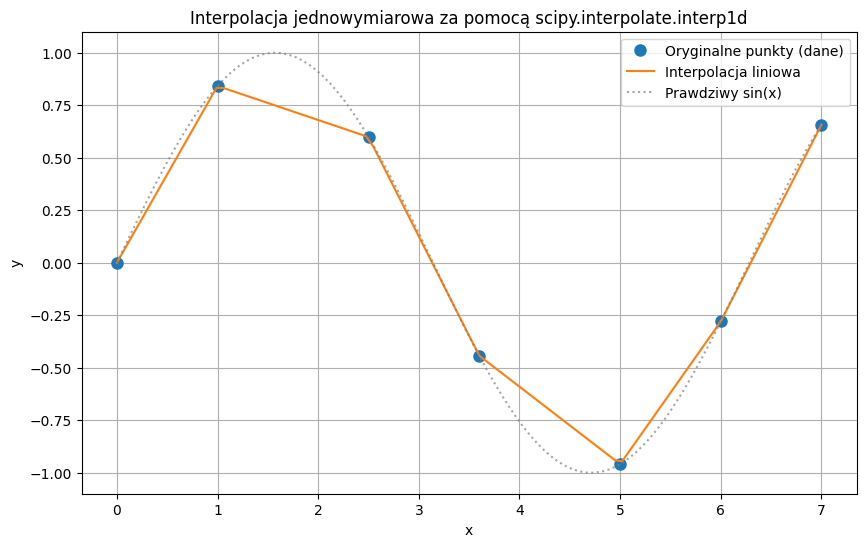

In [246]:
# 1. Przygotowujemy dane wejściowe (kilka punktów pomiarowych)
# Załóżmy, że zmierzyliśmy wartości funkcji sinus w kilku punktach
x_known = np.array([0, 1, 2.5, 3.6, 5, 6, 7])
y_known = np.sin(x_known)

# 2. Tworzymy funkcje interpolujące za pomocą interp1d, używając metody liniowej
f_linear = interp1d(x_known, y_known, kind='linear')

# 3. Tworzymy gęstszą siatkę punktów x, w których chcemy uzyskać interpolowane wartości
x_interp = np.linspace(x_known.min(), x_known.max(), 100)

# 4. Obliczamy interpolowane wartości y dla gęstej siatki x
y_linear_interp = f_linear(x_interp)

# 5. Wizualizacja wyników
plt.figure(figsize=(10, 6))
# Oryginalne punkty
plt.plot(x_known, y_known, 'o', markersize=8, label='Oryginalne punkty (dane)')
# Interpolacja liniowa
plt.plot(x_interp, y_linear_interp, '-', label='Interpolacja liniowa')
# Rzeczywista funkcja sinus dla porównania (w praktyce jej nie znamy)
plt.plot(x_interp, np.sin(x_interp), ':', color='gray', alpha=0.7, label='Prawdziwy sin(x)')

plt.title('Interpolacja jednowymiarowa za pomocą scipy.interpolate.interp1d')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Moduł `scipy.special`: Funkcje Specjalne

`scipy.special` to bogaty moduł zawierający implementacje wielu **funkcji specjalnych** – funkcji matematycznych, które często pojawiają się w zagadnieniach naukowych i inżynierskich. Znajdziemy tu między innymi:

* Funkcje związane z kombinatoryrką (silnia, kombinacje, permutacje itp.)
* Funkcje Bessela (do rozwiązywania równań różniczkowego drugiego stopnia)
* Wielomiany ortogonalne (np. `legendre`, `hermite`) wykorzystywane przy rozwijaniu szeregu Fouriera lub przy zagadnieniach mechaniki kwantowej
* Funkcje eliptyczne
* I wiele innych.


### Przykład 1: Podstawowe funkcje kombinatoryczne

Najbardziej podstawowe operacje kombinatoryczne to obliczanie silni, liczby permutacji i liczby kombinacji. `scipy.special` udostępnia do tego dedykowane, wydajne funkcje.


#### Silnia (Factorial)
n! = 1 * 2 * 3 * ... * n \
Liczba sposobów uporządkowania n różnych elementów.

In [247]:
from scipy.special import factorial, comb, perm

n_fact = 5
fact_val = factorial(n_fact)
print(f"Silnia z {n_fact} (czyli {n_fact}!) wynosi: {fact_val}")

Silnia z 5 (czyli 5!) wynosi: 120.0


#### Kombinacje (Combinations)
"n po k", $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ \
Liczba sposobów wyboru k elementów z n-elementowego zbioru, bez uwzględniania kolejności.

In [248]:
n_comb = 5
k_comb = 2

# Domyślnie repetition=False (bez powtórzeń)
comb_val = comb(n_comb, k_comb, exact=True)
print(f"\nLiczba kombinacji {k_comb}-elementowych ze zbioru {n_comb}-elementowego (bez powtórzeń): C({n_comb}, {k_comb}) = {comb_val}")


Liczba kombinacji 2-elementowych ze zbioru 5-elementowego (bez powtórzeń): C(5, 2) = 10


In [249]:
# Kombinacje z powtórzeniami: repetition=True
# Liczba sposobów wyboru k elementów z n-elementowego zbioru, gdzie elementy mogą się powtarzać.
comb_rep_val = comb(n_comb, k_comb, exact=True, repetition=True)
print(f"Liczba kombinacji {k_comb}-elementowych ze zbioru {n_comb}-elementowego (Z POWTÓRZENIAMI): {comb_rep_val}")

Liczba kombinacji 2-elementowych ze zbioru 5-elementowego (Z POWTÓRZENIAMI): 15


#### Permutacje (Permutations) 
$P(n, k) = \frac{n!}{(n-k)!}$ \
Liczba sposobów wyboru i uporządkowania k elementów z n-elementowego zbioru (kolejność ma znaczenie).

In [250]:
n_perm = 5
k_perm = 2

perm_val = perm(n_perm, k_perm, exact=True)
print(f"\nLiczba permutacji {k_perm}-elementowych ze zbioru {n_perm}-elementowego: P({n_perm}, {k_perm}) = {perm_val}")


Liczba permutacji 2-elementowych ze zbioru 5-elementowego: P(5, 2) = 20


## Obliczanie Pochodnych za pomocą modułu `scipy.differentiate`

Moduł `scipy.differentiate` z funkcją `derivative`*, służy do obliczania pochodnych numerycznych funkcji. Jest to nowoczesny następca historycznej i usuniętej funkcji `scipy.misc.derivative`.

Funkcja `scipy.differentiate.derivative` oblicza n-tą pochodną funkcji w zadanym punkcie (lub punktach) za pomocą **metody różnic skończonych**.

### Przykład użycia `scipy.differentiate.derivative`

Użyjmy tej funkcji do obliczenia wartości pochodnej funkcji $f(x) = x^3 + 3x2 + 2$ w przedziale $x=[0,5]$


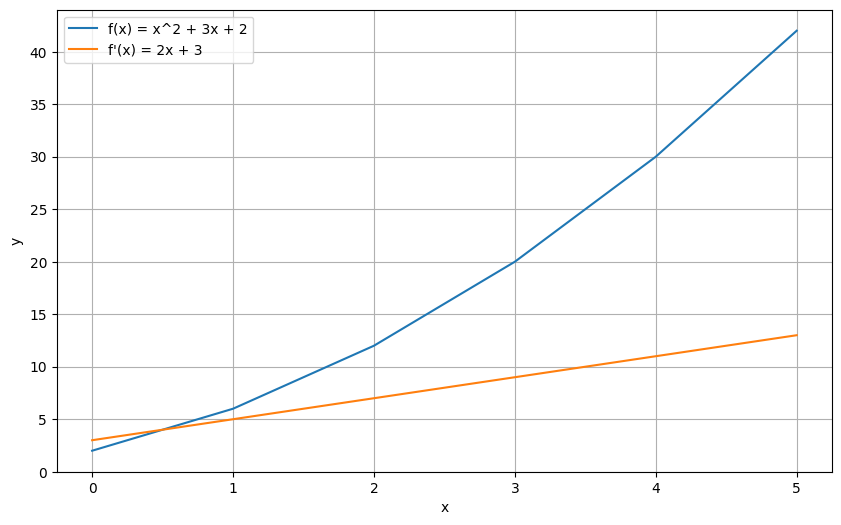

In [251]:
from scipy.differentiate import derivative

def f(x):
    return x**2 + 3*x + 2

x = np.linspace(0, 5, 6)
y = np.array([f(i) for i in x])

df = derivative(f, x)

df.df

plt.figure(figsize=(10, 6))
plt.plot(x, y, '-', markersize=8, label='f(x) = x^2 + 3x + 2')
plt.plot(x, df.df, '-', markersize=8, label='f\'(x) = 2x + 3')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Całkowanie za pomocą modułu `scipy.integrate`

Moduł `scipy.integrate` zawiera szereg funkcji do numerycznego obliczania całek jedno‐ i wielowymiarowych.
Najczęściej używaną funkcją do całek oznaczonych jest `quad`, natomiast `dblquad` i `tplquad` służą do całek dwu- i trójwymiarowych.
Poniższy przykład pokazuje, jak obliczyć całkę oznaczoną funkcji $\sin(x)$ w przedziale $[0, \pi]$.


In [252]:

from scipy.integrate import quad
import numpy as np

# Definiujemy funkcję podcałkową
f = np.sin

# Liczymy całkę
integral, error_estimate = quad(f, 0, np.pi)

print(f"Wynik całki = {integral:.6f}")
print(f"Szacowany błąd numeryczny = {error_estimate:.2e}")


Wynik całki = 2.000000
Szacowany błąd numeryczny = 2.22e-14



## Równania różniczkowe zwyczajne z `scipy.integrate.solve_ivp`

`solve_ivp` pozwala na rozwiązywanie układów równań różniczkowych zwyczajnych (ODE) różnymi metodami (Runge–Kutta, BDF, LSODA …).
Rozważmy prosty model logistyczny wzrostu populacji:
$$
\frac{dy}{dt} = r\,y\Bigl(1-\frac{y}{K}\Bigr)
$$
gdzie:
- $r$ — współczynnik wzrostu,
- $K$ — pojemność środowiska (tzw. *carrying capacity*).


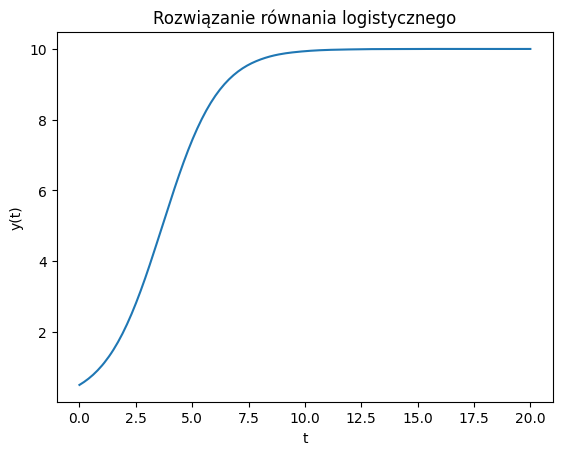

In [253]:

from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Parametry modelu
r, K = 0.8, 10.0

def logistic(t, y):
    return r * y * (1 - y / K)

# Warunek początkowy
y0 = [0.5]

t_span = (0, 20)
t_eval = np.linspace(*t_span, 200)

sol = solve_ivp(logistic, t_span, y0, t_eval=t_eval, method="RK45")

# Wykres
plt.plot(sol.t, sol.y[0])
plt.title("Rozwiązanie równania logistycznego")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()



Rozwiązanie pokazuje typową krzywą sigmoidalną: populacja rośnie szybko na początku, a następnie stabilizuje się na poziomie $K$.



## Transformata Fouriera z `scipy.fft`

Pakiet `scipy.fft` zawiera szybkie, zoptymalizowane implementacje FFT.
Zademonstrujmy analizę sygnału składającego się z dwóch sinusoid o różnych częstotliwościach.


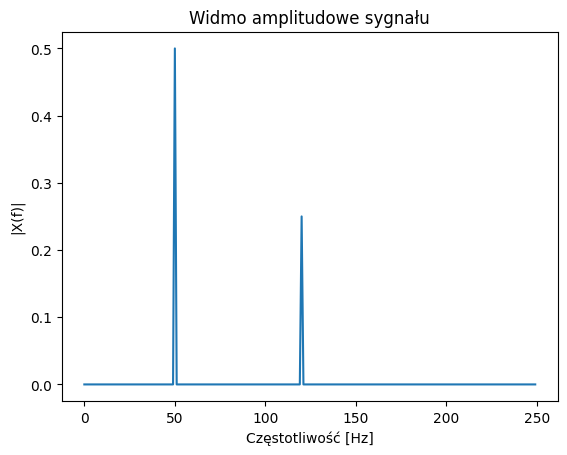

In [254]:

from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Parametry sygnału
fs = 500   # Hz, częstotliwość próbkowania
T  = 1.0   # s, czas trwania
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Sygnał: 50 Hz + 120 Hz
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

# FFT
N = len(t)
yf = fft(signal)
xf = fftfreq(N, 1/fs)

# Moduł widma
magnitude = np.abs(yf) / N

# Tylko część dodatnia
pos_mask = xf >= 0
plt.plot(xf[pos_mask], magnitude[pos_mask])
plt.title("Widmo amplitudowe sygnału")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("|X(f)|")
plt.show()



Na widmie widać wyraźne piki przy 50 Hz i 120 Hz, odpowiadające składowym częstotliwościowym sygnału.


## Algebra liniowa z `scipy.linalg`

Moduł `scipy.linalg` to w Pythonie gotowy zestaw narzędzi do algebry liniowej — od prostych działań macierzowych po zaawansowane dekompozycje i funkcje widmowe. W pigułce:

* **Szybkie podstawy**  
  * `det` i `matrix_rank` – sprawdza odwracalność i rangę macierzy  
  * `inv` i `solve` –  macierz odwrotna lub wynik układu równań bez ręcznej eliminacji Gaussa  

* **Stabilne dekompozycje**  
  * `lu` (z pivotowaniem) – szybkie rozwiązywanie układów  
  * `qr` – metody najmniejszych kwadratów  
  * `svd` – kompresja danych i pseudoinwersja  
  * `schur` – przygotowanie macierzy do analiz widmowych  

* **Analiza widmowa**  
  * `eig` / `eigh` – wartości i wektory własne (w tym zoptymalizowane dla macierzy symetrycznych)  
  * pozwala na diagonalizację i badanie struktury operatorów liniowych  

* **Funkcje macierzowe**  
  * `expm`, `logm`, `sqrtm`… – oblicza wykładniczą, logarytm czy pierwiastek macierzy, co otwiera drogę do symulacji układów dynamicznych  

Całość działa równie sprawnie na macierzach rzeczywistych i zespolonych, dając wydajność niezbędną w zastosowaniach inżynierskich.

### Przykład 1. Wyznacznik i odwracanie macierzy
(Rachunek macierzowy, wyznacznik, odwracanie)

In [255]:
from scipy.linalg import det, inv

A = np.array([[2, 1, 0],
              [1, 3, 1],
              [0, 1, 2]])
print("det(A) =", det(A))       # wyznacznik
print("A^{-1} =\n", inv(A))     # macierz odwrotna

det(A) = 8.0
A^{-1} =
 [[ 0.625 -0.25   0.125]
 [-0.25   0.5   -0.25 ]
 [ 0.125 -0.25   0.625]]


### Przykład 2. Rozwiązywanie układów równań liniowych
(Eliminacja Gaussa, układy równań)

In [256]:
from scipy.linalg import lu, solve_triangular

A = np.array([[3, 2, -1],
              [2, -2, 4],
              [-1, 0.5, -1]])
b = np.array([1, -2, 0])

P, L, U = lu(A)                  # A = P^T·L·U
y = solve_triangular(L, P @ b, lower=True)
x = solve_triangular(U, y)
print("Rozwiązanie x =", x)

Rozwiązanie x = [ 1. -2. -2.]


### Przykład 3. Rząd macierzy
(Rząd macierzy, zależność wektorów)

In [257]:
from scipy.linalg import svd

M = np.array([[1, 2, 3],
              [2, 4, 6],
              [1, 1, 1]])
# rząd = liczba niezerowych sing. wartości
rank = np.sum(svd(M, compute_uv=False) > 1e-10)
print("rank(M) =", rank)

rank(M) = 2


### Przykład 4. Wartości własne i diagonalizacja macierzy

In [258]:
import numpy as np
from scipy.linalg import eig

A = np.array([[4, 0],
              [0, 1]])
w, V = eig(A)        # w – wartości własne, V – kolumny to wektory własne
# jeżeli V jest odwracalne, A = V·diag(w)·V^{-1}
D = np.diag(w)
V_inv = inv(V)
print("D =", D)
print("V^{-1}·A·V =\n", V_inv @ A @ V)  # powinno dać D

D = [[4.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
V^{-1}·A·V =
 [[4. 0.]
 [0. 1.]]


### Przykład 5. Macierz rozrzedzona
Typ macierzy, w której większość elementów ma wartość zero. W przeciwieństwie do macierzy gęstych, które przechowują wszystkie elementy (nawet zerowe), macierze rozrzedzone przechowują tylko elementy niezerowe i ich indeksy. 

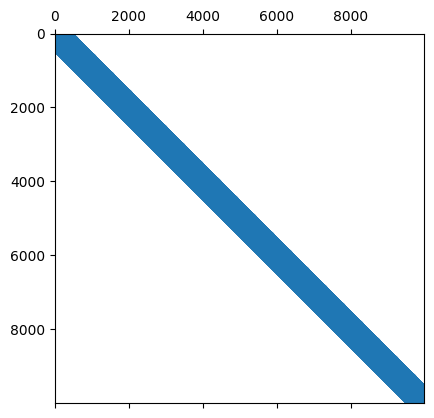

In [259]:
from scipy import sparse

N=100
diag = np.ones([N])  # wektor samych jedynek, długości N
diags = np.array([diag, -2*diag, diag])  # górna, środkowa, dolna przekątna
D = sparse.spdiags(diags, np.array([-1, 0, 1]), N, N) # tworzy macierz rzadką z określonych przekątnych
T = -1/2 * sparse.kronsum(D, D) # Tworzy operator Laplace’a 2D przez iloczyn Kroneckera D ⊕ D
T
plt.spy(T)

## Statystyka

Moduł `scipy.stats` biblioteki SciPy w języku Python to wszechstronne narzędzie do przeprowadzania analiz statystycznych, testów istotności oraz pracy z rozkładami prawdopodobieństwa. Dzięki szerokiemu zestawowi funkcji umożliwia on implementację zarówno podstawowych, jak i zaawansowanych metod statystycznych – od testów normalności i testów parametrycznych, aż po analizę regresji i dopasowywanie rozkładów teoretycznych.
Może służyć jako kluczowe narzędzie do praktycznego zastosowania, takich jak hipotezy statystyczne, testy zgodności, regresja liniowa czy analiza rozkładów prawdopodobieństwa.

### Przykład 1. Rozkłady prawdopodobieństwa
Normalny, t-Studenta, χ² i F-Snedecora wizualizacja i porównanie kształtu podstawowych rozkładów używanych w testach.

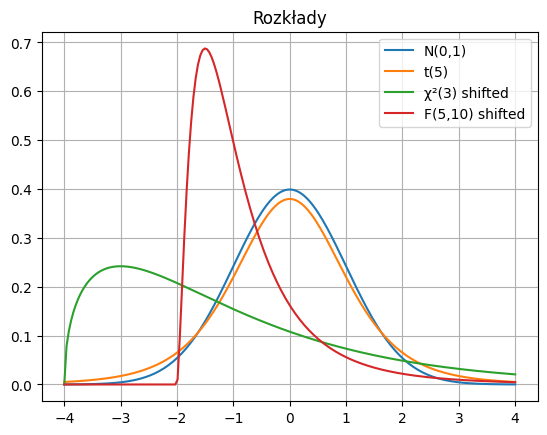

In [260]:
from scipy.stats import norm, t, chi2, f

x = np.linspace(-4, 4, 200)
plt.plot(x, norm.pdf(x),    label="N(0,1)")
plt.plot(x, t.pdf(x, df=5), label="t(5)")
plt.plot(x, chi2.pdf(x+4, df=3), label="χ²(3) shifted")
plt.plot(x, f.pdf(x+2, dfn=5, dfd=10), label="F(5,10) shifted")
plt.legend(); plt.title("Rozkłady"); plt.grid(); plt.show()

### Przykład 2. Generowanie próby losowej i empiryczna dystrybuanta

Pojęcie populacji (N(2,1)) i próby losowej, a także prawdopodobieństwo, że losowa zmienna przyjmuje wartość mniejszą lub równą danej wartości(ECDF).

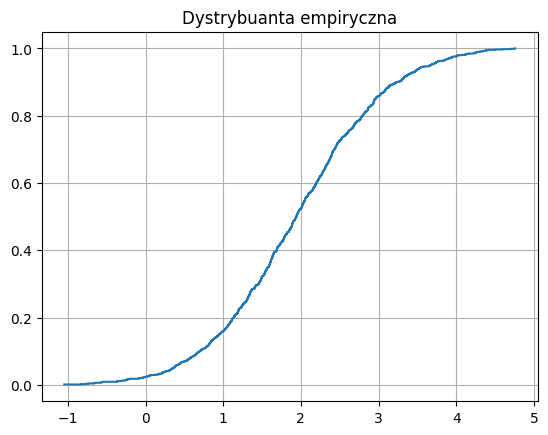

In [261]:
from scipy.stats import norm

# próbka z N(μ=2,σ=1)
sample = norm.rvs(loc=2, scale=1, size=1000, random_state=0)

# empiryczna dystrybuanta (ECDF) – prosty sposób
x = np.sort(sample)
y = np.arange(1, len(x)+1) / len(x)
plt.step(x, y, where="post"); plt.title("Dystrybuanta empiryczna"); plt.grid(); plt.show()


### Przykład 3. Test chi-kwadrat Pearsona

Test zgodności hipotezy, że kostka jest uczciwa (jednakowe prawdopodobieństwa).

In [262]:
from scipy.stats import chisquare

# obserwacje z 6-ściennej kostki (rzut 60 razy)
obs = np.bincount(np.random.randint(1,7, size=60), minlength=7)[1:]
# spodziewane frekwencje
exp = np.ones(6) * 10
stat, p = chisquare(obs, exp)
print("χ² =", stat, "p-value =", p)

χ² = 7.200000000000001 p-value = 0.20618591970955577


### Przykład 4. Test Kołmogorowa–Smirnova

Test zgodności dystrybuanty próbki z rozkładem referencyjnym.

In [263]:
from scipy.stats import kstest

stat, p = kstest(sample, 'norm', args=(0,1))
print("KS stat =", stat, "p-value =", p)

KS stat = 0.6827561230128556 p-value = 0.0


### Przykład 5. Testy normalności

 weryfikacja założeń o normalności (baza dla testów parametrycznych)

In [264]:
from scipy.stats import shapiro, anderson, cramervonmises

# Shapiro–Wilk
stat_sw, p_sw = shapiro(sample)
# Anderson–Darling
res_ad = anderson(sample, dist='norm')
# Cramér–von Mises
res_cvm = cramervonmises(sample, 'norm')
print("Shapiro p =", p_sw)
print("Anderson A =", res_ad.statistic)
print("CvM W =", res_cvm.statistic)

Shapiro p = 0.5912267898689942
Anderson A = 0.2432179174634257
CvM W = 219.01500711231094
